<a href="https://colab.research.google.com/github/AlexBorealis/netology_cvml_hw/blob/master/kozlov_cvml_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [32]:
# Loading packages
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [10]:
# Loading required files
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [11]:
# Creating labels and images
train_label = train[:, 0]
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))

test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
# Splitting sample
X_train, X_test, y_train, y_test = train_test_split(
    train_img, train_label, test_size=.25, random_state=42)

In [5]:
# Reshaping data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalizing data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Standartizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Using PCA
pca = PCA(n_components= .9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [58]:
# Creation classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [59]:
# Evalutaion accuracy metric
y_pred = lr.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9208


In [60]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1025
         1.0       0.96      0.97      0.97      1146
         2.0       0.91      0.90      0.90      1072
         3.0       0.91      0.88      0.90      1151
         4.0       0.92      0.93      0.93      1024
         5.0       0.86      0.89      0.87       898
         6.0       0.94      0.95      0.94      1010
         7.0       0.93      0.92      0.93      1135
         8.0       0.90      0.89      0.89      1005
         9.0       0.90      0.91      0.91      1034

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



In [79]:
# Creation prediction on test data
y_test_pred = lr.predict(pca.transform(test_img.reshape(test_img.shape[0], -1)))
y_test_pred[:10]

array([2., 0., 9., 9., 3., 7., 0., 3., 0., 3.])

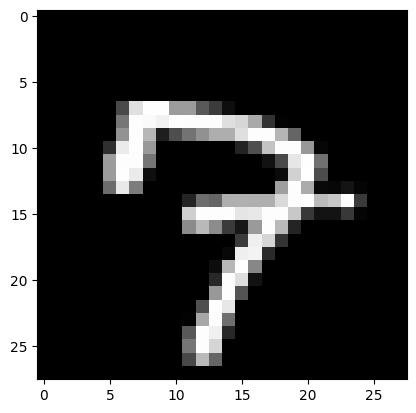

In [84]:
# Creation test image on test data
plt.imshow(test_img[5], cmap='gray')

In [81]:
# Writing results of prediction
submission = pd.DataFrame({'ImageId': range(1, len(y_test_pred) + 1), 'Label': y_test_pred.astype(int)})
submission.to_csv('submission.csv', index=False)